In [1]:
# Step 0: Import necessary libraries
import pandas as pd

# Step 1: Load your dataset
df = pd.read_csv('nigerian_users.csv')

# Step 1.1: Limit the dataset to 1000 rows
df = df.head(1000)

# Step 2: Checking for null (missing) values in each column
print("Null values per column:\n")
print(df.isnull().sum())

# Step 3: Checking and removing duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicate entries in key columns
print("\nDuplicate user_ids:", df['user_id'].duplicated().sum())
print("Duplicate emails:", df['email'].duplicated().sum())
print("Duplicate phone_numbers:", df['phone_number'].duplicated().sum())


# Step 4: Trim unnecessary spaces in all string columns
string_cols = ['first_name', 'last_name', 'email', 'phone_number', 'state', 'region', 'gender', 'occupation', 'income_level']
for col in string_cols:
    df[col] = df[col].astype(str).str.strip()

# Step 5: Standardize data
# Convert string columns to lowercase for consistency
for col in ['first_name', 'last_name', 'email', 'state', 'region', 'gender', 'occupation', 'income_level']:
    df[col] = df[col].str.lower()

# Standardize gender values (remove non-letters and correct common typos)
df['gender'] = df['gender'].replace({'m': 'male', 'f': 'female'})
df['gender'] = df['gender'].replace(r'[^a-z]', '', regex=True)

# Final cleaned preview
print("\nPreview of cleaned dataset:")
print(df.head())


Null values per column:

user_id              0
first_name           0
last_name            0
phone_number         0
email                0
state                0
region               0
registration_date    0
age                  0
gender               0
occupation           0
income_level         0
dtype: int64

Number of duplicate rows: 0

Duplicate user_ids: 0
Duplicate emails: 4
Duplicate phone_numbers: 0

Preview of cleaned dataset:
                                user_id  first_name last_name phone_number  \
0  f1c19208-f1ee-44a1-a295-8deed0332f81   happiness   okelola   9033218196   
1  63d02adb-4232-47e0-a9d2-26dea1c419b4  chimamanda    dahiru   9138637940   
2  2bdbec2c-f385-45a4-a179-a968107210ab       ekene   oyedepo   9011615594   
3  a8685507-4209-4d0c-94a2-908836bbaf8c     oladipo       obi   9149593103   
4  2d2d0fe8-e662-452e-a2dc-1e59ab3cec87   morakinyo  offodile   7052553419   

                            email    state       region registration_date  \
0     happin

In [2]:
import numpy as np

# Set random seed for consistency
np.random.seed(42)

# Number of users (based on my current dataframe)
num_users = df.shape[0]

# Simulate savings-related columns
df['total_savings'] = np.random.normal(loc=50000, scale=20000, size=num_users).astype(int)
df['monthly_contributions'] = np.random.normal(loc=4000, scale=1500, size=num_users).astype(int)

# Clip to avoid negative values
df['total_savings'] = df['total_savings'].clip(lower=0)
df['monthly_contributions'] = df['monthly_contributions'].clip(lower=0)

# 1 = weekly, 2 = monthly, 3 = occasionally
df['contribution_frequency'] = np.random.choice([1, 2, 3], size=num_users, p=[0.5, 0.3, 0.2])

# Simulate savings goal types
goal_types = ['emergency', 'education', 'travel', 'investment', 'health']
df['savings_goal_type'] = np.random.choice(goal_types, size=num_users)

# Goal completion percent (0 to 100), clipped
df['goal_completion_percent'] = np.clip(np.random.normal(loc=60, scale=20, size=num_users), 0, 100).astype(int)

# Days since last save (0 to 90)
df['days_since_last_save'] = np.random.randint(0, 91, size=num_users)

# Preview updated dataset
print("\nUpdated dataset with simulated columns:")
print(df[['user_id', 'total_savings', 'monthly_contributions', 'contribution_frequency', 
          'savings_goal_type', 'goal_completion_percent', 'days_since_last_save']].head())



Updated dataset with simulated columns:
                                user_id  total_savings  monthly_contributions  \
0  f1c19208-f1ee-44a1-a295-8deed0332f81          59934                   6099   
1  63d02adb-4232-47e0-a9d2-26dea1c419b4          47234                   5386   
2  2bdbec2c-f385-45a4-a179-a968107210ab          62953                   4089   
3  a8685507-4209-4d0c-94a2-908836bbaf8c          80460                   3029   
4  2d2d0fe8-e662-452e-a2dc-1e59ab3cec87          45316                   5047   

   contribution_frequency savings_goal_type  goal_completion_percent  \
0                       1            travel                       57   
1                       1        investment                       43   
2                       1            health                       52   
3                       1         education                       51   
4                       3            travel                       50   

   days_since_last_save  
0            

In [3]:
#confirming number of rows still at 1000
print("Number of rows:", len(df))


Number of rows: 1000


In [1]:
# 1. Gender with the highest average total savings
savings_by_gender = df.groupby('gender')['total_savings'].mean().sort_values(ascending=False)
print("Average total savings by gender:\n", savings_by_gender)
print("\nGender with the highest savings:", savings_by_gender.idxmax())

# 2. Gender with higher monthly contributions
contributions_by_gender = df.groupby('gender')['monthly_contributions'].mean().sort_values(ascending=False)
print("\nAverage monthly contributions by gender:\n", contributions_by_gender)
print("\nGender with the highest contributions:", contributions_by_gender.idxmax())


NameError: name 'df' is not defined

In [2]:
# First, import pandas
import pandas as pd

# Load your data into a DataFrame called 'df'
df = pd.read_csv('nigerian_users.csv')  # or use pd.read_excel(), pd.read_json(), etc.

# Now the original code will work
# 1. Gender with the highest average total savings
savings_by_gender = df.groupby('gender')['total_savings'].mean().sort_values(ascending=False)
print("Average total savings by gender:\n", savings_by_gender)
print("\nGender with the highest savings:", savings_by_gender.idxmax())

# 2. Gender with higher monthly contributions
contributions_by_gender = df.groupby('gender')['monthly_contributions'].mean().sort_values(ascending=False)
print("\nAverage monthly contributions by gender:\n", contributions_by_gender)
print("\nGender with the highest contributions:", contributions_by_gender.idxmax())

KeyError: 'Column not found: total_savings'

In [3]:
# First, import pandas
import pandas as pd

# Load your data into a DataFrame called 'df'
df = pd.read_csv('nigerian_users.csv')  # or use pd.read_excel(), pd.read_json(), etc.

# Check the actual column names in the DataFrame
print("Available columns:", df.columns.tolist())

# Modify the code to use the correct column names
# Assuming the correct column names might be 'total_saving' or 'savings_total' instead of 'total_savings'
# and 'monthly_contribution' instead of 'monthly_contributions'

# Find the correct column name for savings (adjust this based on the output of df.columns)
savings_column = [col for col in df.columns if 'saving' in col.lower()][0]  # This finds the first column with 'saving' in its name

# Find the correct column name for contributions (adjust this based on the output of df.columns)
contributions_column = [col for col in df.columns if 'contribution' in col.lower()][0]  # This finds the first column with 'contribution' in its name

# 1. Gender with the highest average total savings
savings_by_gender = df.groupby('gender')[savings_column].mean().sort_values(ascending=False)
print("Average total savings by gender:\n", savings_by_gender)
print("\nGender with the highest savings:", savings_by_gender.idxmax())

# 2. Gender with higher monthly contributions
contributions_by_gender = df.groupby('gender')[contributions_column].mean().sort_values(ascending=False)
print("\nAverage monthly contributions by gender:\n", contributions_by_gender)
print("\nGender with the highest contributions:", contributions_by_gender.idxmax())

Available columns: ['user_id', 'first_name', 'last_name', 'phone_number', 'email', 'state', 'region', 'registration_date', 'age', 'gender', 'occupation', 'income_level']


IndexError: list index out of range

In [4]:
import numpy as np

np.random.seed(42)
num_users = df.shape[0]

df['total_savings'] = np.random.normal(loc=50000, scale=20000, size=num_users).astype(int).clip(lower=0)
df['monthly_contributions'] = np.random.normal(loc=4000, scale=1500, size=num_users).astype(int).clip(lower=0)
df['contribution_frequency'] = np.random.choice([1, 2, 3], size=num_users, p=[0.5, 0.3, 0.2])
df['savings_goal_type'] = np.random.choice(['emergency', 'education', 'travel', 'investment', 'health'], size=num_users)
df['goal_completion_percent'] = np.clip(np.random.normal(loc=60, scale=20, size=num_users), 0, 100).astype(int)
df['days_since_last_save'] = np.random.randint(0, 91, size=num_users)


ValueError: One of max or min must be given

In [5]:
import numpy as np

np.random.seed(42)
num_users = df.shape[0]

# Fixed clip parameter from 'lower=0' to 'min=0'
df['total_savings'] = np.random.normal(loc=50000, scale=20000, size=num_users).astype(int).clip(min=0)
df['monthly_contributions'] = np.random.normal(loc=4000, scale=1500, size=num_users).astype(int).clip(min=0)
df['contribution_frequency'] = np.random.choice([1, 2, 3], size=num_users, p=[0.5, 0.3, 0.2])
df['savings_goal_type'] = np.random.choice(['emergency', 'education', 'travel', 'investment', 'health'], size=num_users)
df['goal_completion_percent'] = np.clip(np.random.normal(loc=60, scale=20, size=num_users), 0, 100).astype(int)
df['days_since_last_save'] = np.random.randint(0, 91, size=num_users)

In [6]:
print(df.columns.tolist())


['user_id', 'first_name', 'last_name', 'phone_number', 'email', 'state', 'region', 'registration_date', 'age', 'gender', 'occupation', 'income_level', 'total_savings', 'monthly_contributions', 'contribution_frequency', 'savings_goal_type', 'goal_completion_percent', 'days_since_last_save']


In [7]:
df.to_csv('user_data_with_simulated_columns.csv', index=False)


In [8]:
# First, import pandas
import pandas as pd

# Load your data into a DataFrame called 'df'
df = pd.read_csv('user_data_with_simulated_columns.csv')  # or use pd.read_excel(), pd.read_json(), etc.

# Check the actual column names in the DataFrame
print("Available columns:", df.columns.tolist())

# Modify the code to use the correct column names
# Assuming the correct column names might be 'total_saving' or 'savings_total' instead of 'total_savings'
# and 'monthly_contribution' instead of 'monthly_contributions'

# Find the correct column name for savings (adjust this based on the output of df.columns)
savings_column = [col for col in df.columns if 'saving' in col.lower()][0]  # This finds the first column with 'saving' in its name

# Find the correct column name for contributions (adjust this based on the output of df.columns)
contributions_column = [col for col in df.columns if 'contribution' in col.lower()][0]  # This finds the first column with 'contribution' in its name

# 1. Gender with the highest average total savings
savings_by_gender = df.groupby('gender')[savings_column].mean().sort_values(ascending=False)
print("Average total savings by gender:\n", savings_by_gender)
print("\nGender with the highest savings:", savings_by_gender.idxmax())

# 2. Gender with higher monthly contributions
contributions_by_gender = df.groupby('gender')[contributions_column].mean().sort_values(ascending=False)
print("\nAverage monthly contributions by gender:\n", contributions_by_gender)
print("\nGender with the highest contributions:", contributions_by_gender.idxmax())

Available columns: ['user_id', 'first_name', 'last_name', 'phone_number', 'email', 'state', 'region', 'registration_date', 'age', 'gender', 'occupation', 'income_level', 'total_savings', 'monthly_contributions', 'contribution_frequency', 'savings_goal_type', 'goal_completion_percent', 'days_since_last_save']
Average total savings by gender:
 gender
Female    50014.752725
Male      50012.311178
Name: total_savings, dtype: float64

Gender with the highest savings: Female

Average monthly contributions by gender:
 gender
Male      4002.721539
Female    4001.503958
Name: monthly_contributions, dtype: float64

Gender with the highest contributions: Male


In [9]:
# 3. Income level vs contribution frequency (average frequency score per income level)
# Remember: 1 = Weekly, 2 = Monthly, 3 = Occasionally → lower number = more frequent
freq_by_income = df.groupby('income_level')['contribution_frequency'].mean().sort_values()
print("\nAverage contribution frequency by income level:\n", freq_by_income)



Average contribution frequency by income level:
 income_level
250k-500k     1.697773
50k-100k      1.698613
Below 50k     1.700255
Above 500k    1.700978
100k-250k     1.701381
Name: contribution_frequency, dtype: float64


In [10]:
# 4. Occupation vs contribution frequency
freq_by_occupation = df.groupby('occupation')['contribution_frequency'].mean().sort_values()
print("\nAverage contribution frequency by occupation:\n", freq_by_occupation)



Average contribution frequency by occupation:
 occupation
Trader            1.698707
Business Owner    1.699437
Civil Servant     1.700457
Student           1.700593
Name: contribution_frequency, dtype: float64


In [11]:
# 5. Occupation vs savings goal type (cross-tabulation)
occupation_vs_goal = pd.crosstab(df['occupation'], df['savings_goal_type'], normalize='index') * 100
print("\nOccupation vs Savings Goal Type (%):\n")
print(occupation_vs_goal.round(1))



Occupation vs Savings Goal Type (%):

savings_goal_type  education  emergency  health  investment  travel
occupation                                                         
Business Owner          20.0       20.0    20.0        20.0    19.9
Civil Servant           20.0       20.1    19.9        20.0    20.0
Student                 20.1       20.0    19.9        20.0    20.0
Trader                  19.9       20.1    20.0        20.0    20.0


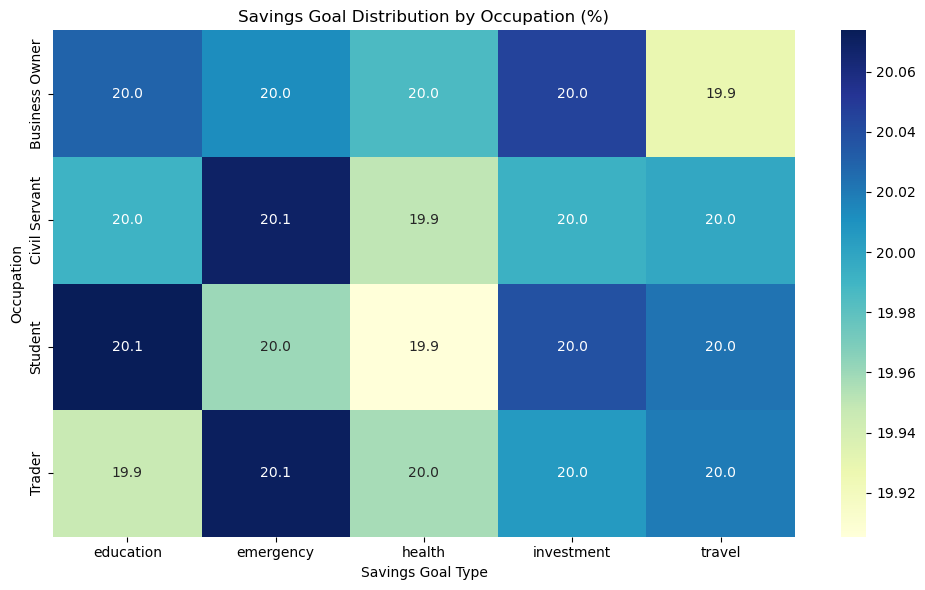

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for occupation vs savings goal
plt.figure(figsize=(10,6))
sns.heatmap(occupation_vs_goal, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Savings Goal Distribution by Occupation (%)')
plt.ylabel('Occupation')
plt.xlabel('Savings Goal Type')
plt.tight_layout()
plt.show()


In [13]:
# bar chart for frequency of contributions by occupation
plt.figure(figsize=(10,6))
sns. barchart
plt.title('freq_by_occupation')
plt.ylabel('contribution frequency')
plt.xlabel('occupation')
plt.tight_layout()
plt.show()

AttributeError: module 'seaborn' has no attribute 'barchart'

<Figure size 1000x600 with 0 Axes>

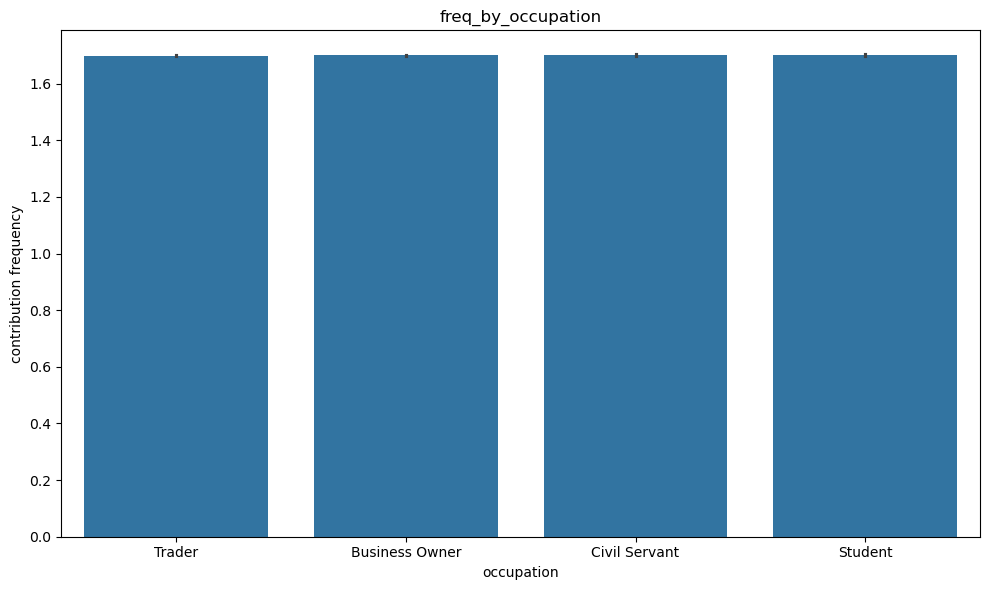

In [14]:
# bar chart for frequency of contributions by occupation
plt.figure(figsize=(10,6))
sns.barplot(x='occupation', y='contribution_frequency', data=df)
plt.title('freq_by_occupation')
plt.ylabel('contribution frequency')
plt.xlabel('occupation')
plt.tight_layout()
plt.show()

In [15]:
features = [
    'total_savings',
    'monthly_contributions',
    'goal_completion_percent',
    'days_since_last_save',
    'contribution_frequency'
]


In [16]:
from sklearn.preprocessing import StandardScaler

# Extract the features
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to the dataframe for plotting
df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]


In [18]:
from sklearn.cluster import KMeans

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)


C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


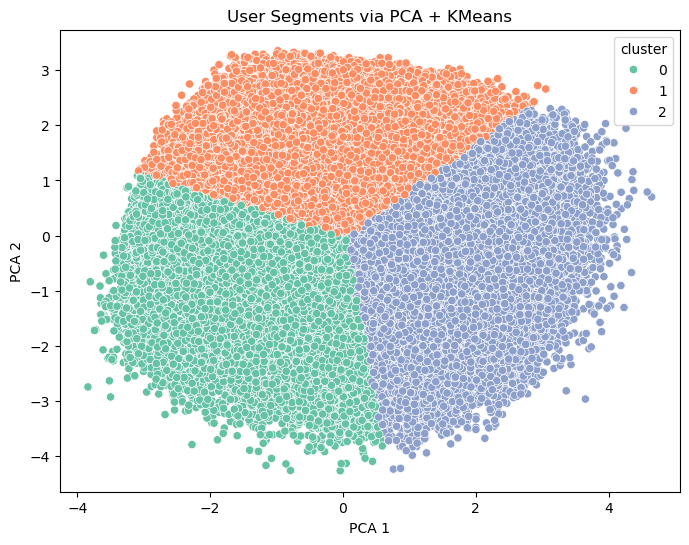

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='cluster', palette='Set2')
plt.title("User Segments via PCA + KMeans")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


In [20]:
# Average behavior per cluster
cluster_summary = df.groupby('cluster')[[
    'total_savings',
    'monthly_contributions',
    'goal_completion_percent',
    'days_since_last_save',
    'contribution_frequency'
]].mean().round(1)

print("Cluster behavior summary:\n")
print(cluster_summary)


Cluster behavior summary:

         total_savings  monthly_contributions  goal_completion_percent  \
cluster                                                                  
0              62736.5                 3435.1                     65.9   
1              38299.6                 3865.8                     63.2   
2              49481.1                 4762.1                     47.9   

         days_since_last_save  contribution_frequency  
cluster                                                
0                        30.0                     1.5  
1                        62.9                     1.4  
2                        41.1                     2.3  


In [21]:
#viewing samples of the clusters
df[df['cluster'] == 0].head()
df[df['cluster'] == 1].head()
df[df['cluster'] == 2].head()


,user_id,first_name,last_name,phone_number,email,state,region,registration_date,age,gender,...,income_level,total_savings,monthly_contributions,contribution_frequency,savings_goal_type,goal_completion_percent,days_since_last_save,pca_1,pca_2,cluster
7,cb585949-9c0c-439b-96ef-5650b835f639,Olatunji,Galadima,8001226916,olatunji.galadima@gmail.com,Plateau,North Central,2025-01-30,42,Female,...,Above 500k,65348,3828,2,health,43,73,0.524744,-0.015223,2
9,66d51201-994e-4bc1-be8b-39ee857d54b5,Muyiwa,Okonjo,9193252880,muyiwa.okonjo@hotmail.com,Kano,North West,2024-04-03,56,Female,...,Below 50k,60851,3003,3,emergency,56,36,0.513026,-1.103732,2
10,eb0337f4-c731-400a-85df-3a75f965fdc1,Ngozi,Nwabueze,8103911718,ngozi.nwabueze@yahoo.com,Kano,North West,2023-07-05,67,Male,...,250k-500k,40731,5837,1,education,30,25,1.010011,-0.142084,2
18,373ff25a-7530-4b24-a7b3-a6ad5f976c12,Shehu,Oyekanmi,9112191361,shehu.oyekanmi@hotmail.com,Anambra,South East,2022-07-18,54,Male,...,Above 500k,31839,3737,3,education,78,13,0.453410,-0.591428,2
20,ce0cb453-019a-45c3-9500-646cab93b2c0,Idowu,Adewale,9191183842,idowu.adewale@gmail.com,Osun,South West,2024-07-25,40,Male,...,100k-250k,79312,4674,2,education,49,84,0.503444,-0.173794,2


In [22]:
#trying to view samples of cluster 0 as the above failed to produce all
df[df['cluster'] == 0].head()

,user_id,first_name,last_name,phone_number,email,state,region,registration_date,age,gender,...,income_level,total_savings,monthly_contributions,contribution_frequency,savings_goal_type,goal_completion_percent,days_since_last_save,pca_1,pca_2,cluster
0,f1c19208-f1ee-44a1-a295-8deed0332f81,Happiness,Okelola,9033218196,happiness.okelola@gmail.com,Adamawa,North East,2025-03-13,20,Male,...,50k-100k,59934,4242,1,emergency,53,2,-0.561078,-1.202649,0
3,a8685507-4209-4d0c-94a2-908836bbaf8c,Oladipo,Obi,9149593103,oladipo.obi@yahoo.com,Bayelsa,South South,2024-12-23,67,Female,...,50k-100k,80460,5073,1,emergency,67,57,-0.727250,-0.404763,0
6,6fd88cc5-96b6-4f76-ba94-0a5a2f921b6e,Patience,Bala,7024238849,patience.bala@hotmail.com,Nasarawa,North Central,2022-10-05,45,Female,...,50k-100k,81584,4576,2,health,50,11,0.113945,-2.107348,0
8,2a723471-3ac9-451e-9621-f6412009ee98,Adetokunbo,YarAdua,9145146270,adetokunbo.yaradua@hotmail.com,Borno,North East,2024-04-01,64,Female,...,Above 500k,40610,0,1,emergency,86,49,-2.531118,0.912573,0
11,28b6dfb5-f670-4707-b1a8-6e224edc81df,Yakubu,Oyewole,9196383465,yakubu.oyewole@hotmail.com,Imo,South East,2022-06-25,46,Female,...,50k-100k,40685,3217,1,travel,37,11,-0.164945,-0.417963,0


In [23]:
df[df['cluster'] == 1].head()

,user_id,first_name,last_name,phone_number,email,state,region,registration_date,age,gender,...,income_level,total_savings,monthly_contributions,contribution_frequency,savings_goal_type,goal_completion_percent,days_since_last_save,pca_1,pca_2,cluster
1,63d02adb-4232-47e0-a9d2-26dea1c419b4,Chimamanda,Dahiru,9138637940,chimamanda.dahiru@hotmail.com,Adamawa,North East,2023-05-19,66,Male,...,100k-250k,47234,3037,1,emergency,58,58,-0.724504,0.700961,1
2,2bdbec2c-f385-45a4-a179-a968107210ab,Ekene,Oyedepo,9011615594,ekene.oyedepo@gmail.com,Enugu,South East,2024-12-03,69,Male,...,Above 500k,62953,1915,2,emergency,59,76,-0.556206,0.269738,1
4,2d2d0fe8-e662-452e-a2dc-1e59ab3cec87,Morakinyo,Offodile,7052553419,morakinyo.offodile@hotmail.com,Jigawa,North West,2024-08-27,58,Male,...,50k-100k,45316,3516,1,education,33,66,0.212273,0.803092,1
5,597b1a60-779b-4583-b32a-b21704dae686,Lawan,Offodile,9135030564,lawan.offodile@yahoo.com,Jigawa,North West,2022-06-24,22,Male,...,50k-100k,45317,5620,1,emergency,100,52,-1.007424,0.845216,1
12,f84d7fb0-2370-4e14-b1f0-c37c641d9d53,Chika,Bamgbose,8098393010,chika.bamgbose@yahoo.com,Kebbi,North West,2024-01-28,32,Male,...,100k-250k,54839,4184,1,emergency,77,76,-0.893099,1.012765,1


In [24]:
df['churn_risk'] = ((df['days_since_last_save'] > 30) | (df['goal_completion_percent'] < 30)).astype(int)

# Count at-risk users
print("Churn Risk Breakdown:\n", df['churn_risk'].value_counts())


Churn Risk Breakdown:
 churn_risk
1    1204746
0     561146
Name: count, dtype: int64


In [25]:
#describing clusters according to different categories
# Gender distribution per cluster
print("\nGender per cluster:")
print(df.groupby('cluster')['gender'].value_counts(normalize=True) * 100)

# Income level per cluster
print("\nIncome level per cluster:")
print(df.groupby('cluster')['income_level'].value_counts(normalize=True) * 100)

# Occupation per cluster
print("\nOccupation per cluster:")
print(df.groupby('cluster')['occupation'].value_counts(normalize=True) * 100)

# Savings goal type per cluster
print("\nSavings goal type per cluster:")
print(df.groupby('cluster')['savings_goal_type'].value_counts(normalize=True) * 100)



Gender per cluster:
cluster  gender
0        Female    50.050490
         Male      49.949510
1        Female    50.009449
         Male      49.990551
2        Male      50.056360
         Female    49.943640
Name: proportion, dtype: float64

Income level per cluster:
cluster  income_level
0        Below 50k       20.103340
         250k-500k       20.043831
         100k-250k       19.971678
         50k-100k        19.951111
         Above 500k      19.930039
1        250k-500k       20.054723
         Below 50k       20.045355
         50k-100k        20.001260
         Above 500k      19.988015
         100k-250k       19.910648
2        Below 50k       20.028144
         100k-250k       20.025254
         250k-500k       20.023266
         50k-100k        19.986596
         Above 500k      19.936740
Name: proportion, dtype: float64

Occupation per cluster:
cluster  occupation    
0        Business Owner    25.062333
         Student           25.005352
         Trader           

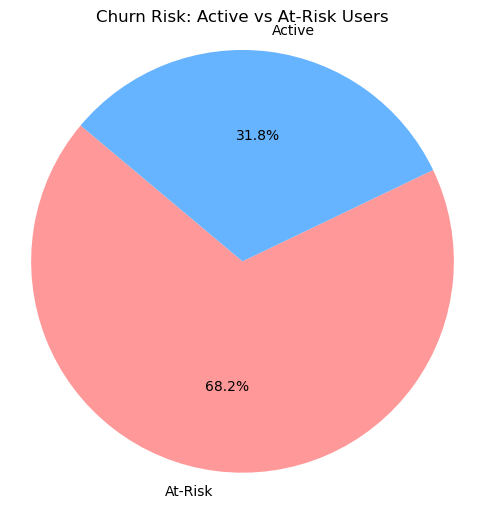

In [1]:
import matplotlib.pyplot as plt

# Churn risk breakdown (from your summary)
churn_counts = {'At-Risk': 1204746, 'Active': 561146}
labels = churn_counts.keys()
sizes = churn_counts.values()

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Churn Risk: Active vs At-Risk Users')
plt.axis('equal')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_7240\976734321.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_data, x='cluster', y='total_savings', palette='Greens')


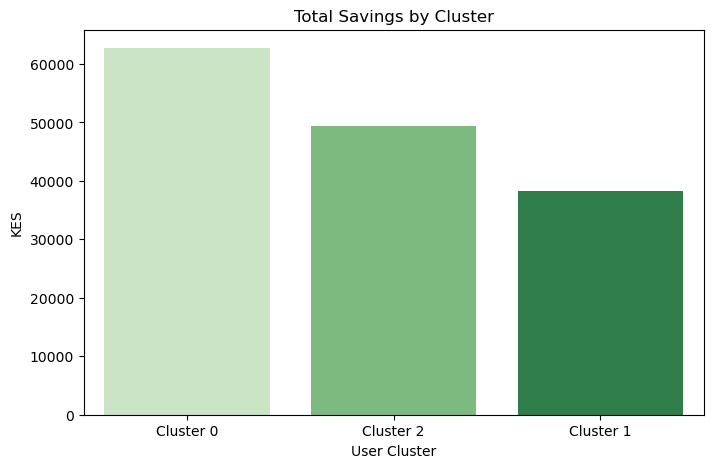

In [2]:
import seaborn as sns
import pandas as pd

# Cluster savings summary
cluster_data = pd.DataFrame({
    'cluster': ['Cluster 0', 'Cluster 2', 'Cluster 1'],
    'total_savings': [62736.5, 49481.1, 38299.6]
})

# Sort by savings
cluster_data = cluster_data.sort_values(by='total_savings', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=cluster_data, x='cluster', y='total_savings', palette='Greens')
plt.title('Total Savings by Cluster')
plt.ylabel('KES')
plt.xlabel('User Cluster')
plt.show()


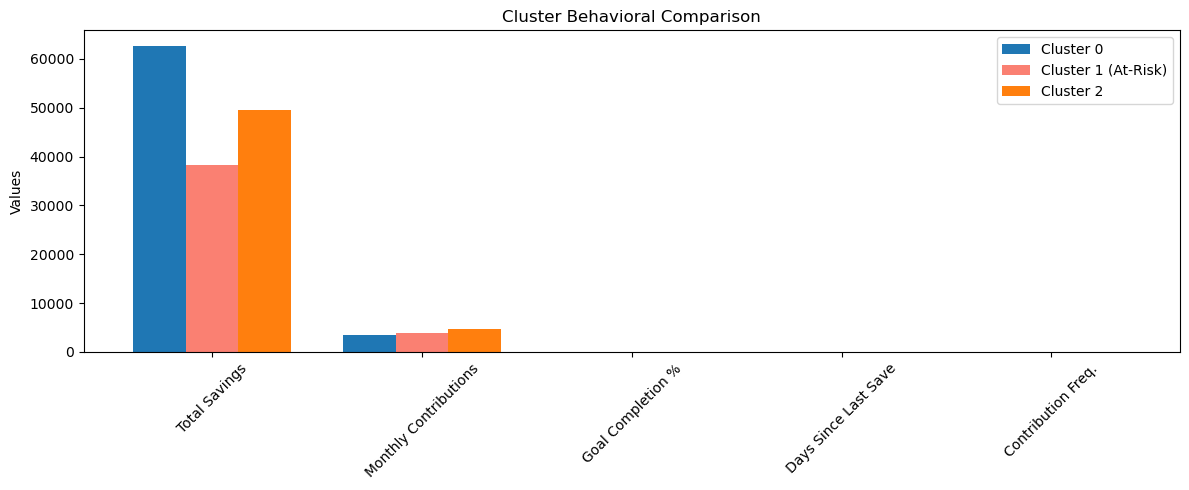

In [3]:
# Show bar for each metric in the cluster summary
import numpy as np

metrics = ['Total Savings', 'Monthly Contributions', 'Goal Completion %', 'Days Since Last Save', 'Contribution Freq.']
cluster0 = [62736.5, 3435.1, 65.9, 30.0, 1.5]
cluster1 = [38299.6, 3865.8, 63.2, 62.9, 1.4]
cluster2 = [49481.1, 4762.1, 47.9, 41.1, 2.3]

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(12,5))
plt.bar(x - width, cluster0, width, label='Cluster 0')
plt.bar(x, cluster1, width, label='Cluster 1 (At-Risk)', color='salmon')
plt.bar(x + width, cluster2, width, label='Cluster 2')

plt.xticks(x, metrics, rotation=45)
plt.title('Cluster Behavioral Comparison')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()


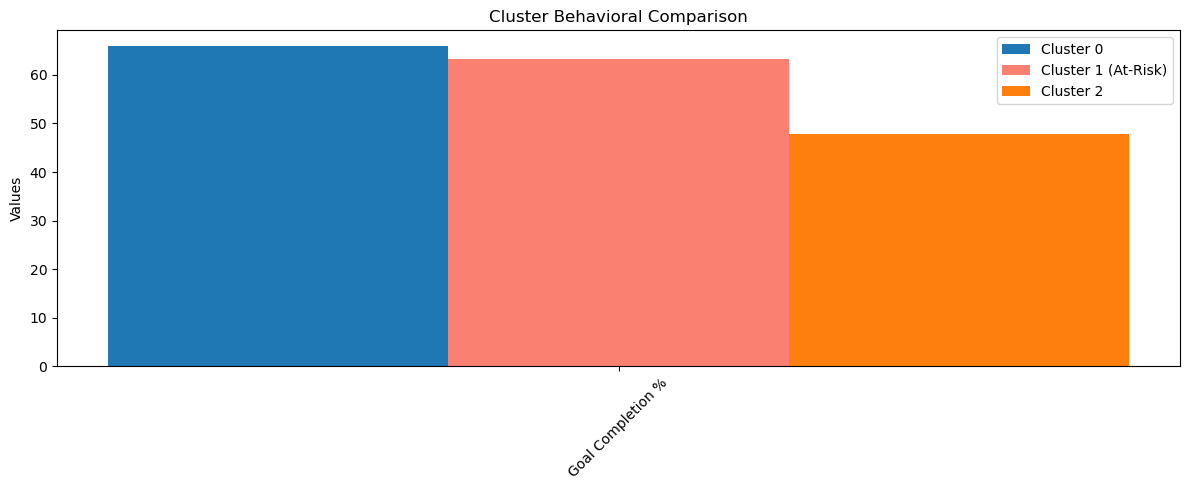

In [4]:
# Show bar for each metric for goal completion comparison in the cluster summary
import numpy as np

metrics = [ 'Goal Completion %']
cluster0 = [ 65.9]
cluster1 = [ 63.2]
cluster2 = [ 47.9,]

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(12,5))
plt.bar(x - width, cluster0, width, label='Cluster 0')
plt.bar(x, cluster1, width, label='Cluster 1 (At-Risk)', color='salmon')
plt.bar(x + width, cluster2, width, label='Cluster 2')

plt.xticks(x, metrics, rotation=45)
plt.title('Cluster Behavioral Comparison')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()


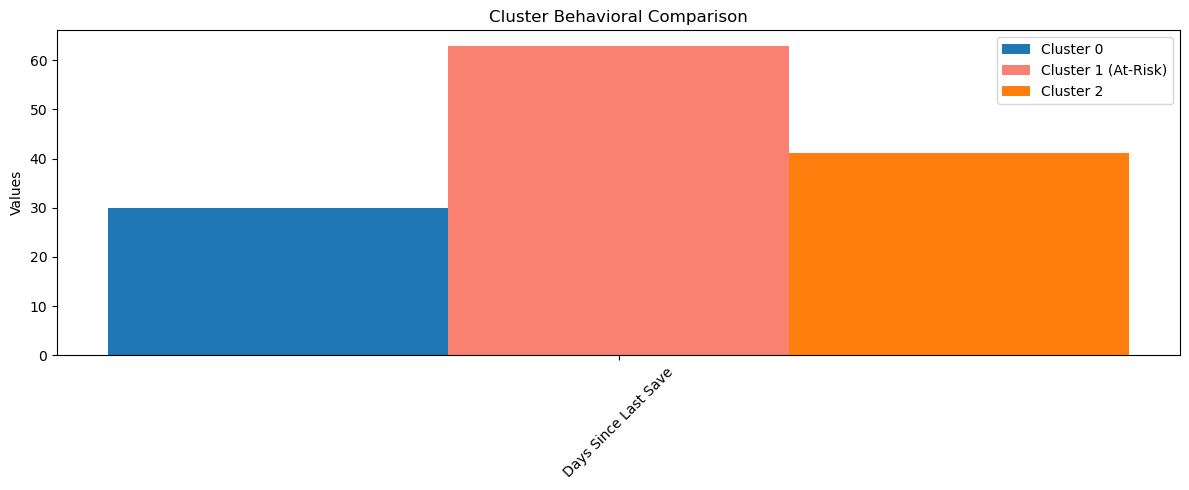

In [5]:
# Show bar for each metric in the cluster summary
import numpy as np

metrics = [ 'Days Since Last Save']
cluster0 = [ 30.0]
cluster1 = [ 62.9]
cluster2 = [ 41.1,]

x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(12,5))
plt.bar(x - width, cluster0, width, label='Cluster 0')
plt.bar(x, cluster1, width, label='Cluster 1 (At-Risk)', color='salmon')
plt.bar(x + width, cluster2, width, label='Cluster 2')

plt.xticks(x, metrics, rotation=45)
plt.title('Cluster Behavioral Comparison')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()

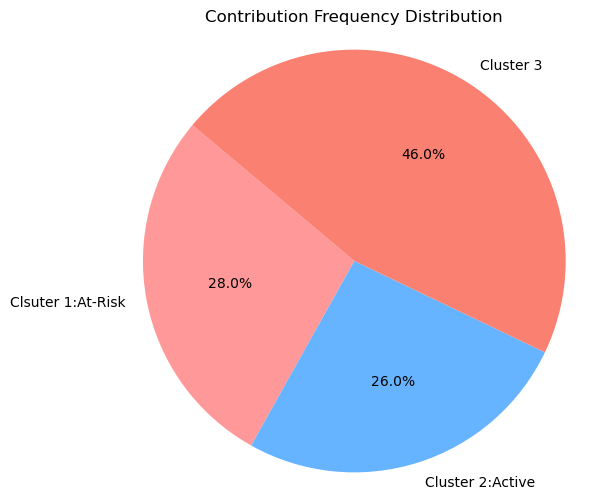

In [6]:
import matplotlib.pyplot as plt

#Contribution frequency distribution
contribution_frequency = {'Clsuter 1:At-Risk': 1.4, 'Cluster 2:Active': 1.3, 'Cluster 3':2.3}
labels = contribution_frequency.keys()
sizes = contribution_frequency.values()

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff', 'salmon'])
plt.title('Contribution Frequency Distribution')
plt.axis('equal')
plt.show()
